In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from finquant.efficient_frontier import EfficientFrontier

In [2]:
returns = pd.read_csv("hist_return.csv", index_col="Date", parse_dates=True).dropna()
returns

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR
Date,,,,,,,
2017-03-28,0.007360,0.000000,-0.001586,0.001661,-0.000677,0.007599,0.007973
2017-03-29,0.001478,0.005694,0.003773,0.002487,0.003484,0.003594,0.002637
2017-03-30,0.002530,0.000000,-0.001780,-0.005375,-0.000579,0.004873,0.008473
2017-03-31,-0.001935,-0.002343,0.001189,-0.006651,-0.000386,0.000351,0.001884
2017-04-03,-0.001686,-0.006184,0.002480,0.006487,0.002862,-0.005198,-0.018363
...,...,...,...,...,...,...,...
2019-12-24,0.000124,-0.003621,0.000769,-0.001684,0.001002,-0.000097,0.002741
2019-12-26,0.005176,0.007096,0.000768,0.007874,-0.000728,0.002188,-0.001307
2019-12-27,-0.000185,0.001203,0.001536,0.004278,0.000911,-0.001649,-0.004522


We're going to use average return of the each ticker and the covariance of the portfolio to get efficient frontier.

In [3]:
mean_returns = returns.mean()
mean_returns

IVV     0.000573
IDEV    0.000330
IUSB    0.000166
IEMG    0.000332
IAGG    0.000194
IJH     0.000386
IJR     0.000411
dtype: float64

In [4]:
covariance = returns.cov()
covariance

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR
IVV,0.000069,0.000050,-0.000003,0.000064,-0.000002,0.000066,0.000069
IDEV,0.000050,0.000053,-0.000001,0.000060,-0.000002,0.000049,0.000051
IUSB,-0.000003,-0.000001,0.000003,-0.000002,0.000002,-0.000003,-0.000004
IEMG,0.000064,0.000060,-0.000002,0.000107,-0.000002,0.000063,0.000066
IAGG,-0.000002,-0.000002,0.000002,-0.000002,0.000004,-0.000003,-0.000003
IJH,0.000066,0.000049,-0.000003,0.000063,-0.000003,0.000077,0.000083
IJR,0.000069,0.000051,-0.000004,0.000066,-0.000003,0.000083,0.000098


We pass the `mean_returns` and `covariance` as the arguments to the `EfficientFrontier` class to obtain the efficient frontier. The `efficient_frontier()` method will find the efficient portfolios with various returns. The default risk-free rate is set to 0.005. And then, we're going to make a new DataFrame with this data with column names specified as 'target_risk' and 'target_return'.

In [5]:
ef = EfficientFrontier(mean_returns, covariance)
return_risk_frontier = pd.DataFrame(ef.efficient_frontier(), columns=['target_risk', 'target_return']) 
return_risk_frontier

,target_risk,target_return
0,0.025804,0.042000
1,0.024738,0.043030
2,0.023892,0.044061
3,0.023265,0.045091
4,0.022878,0.046121
...,...,...
95,0.125541,0.139879
96,0.127005,0.140909
97,0.128469,0.141939
98,0.129935,0.142970


The `plot()` method from the pandas will draw a graph and you can pass the size of figure and style as arguments.

Text(0, 0.5, 'Return')

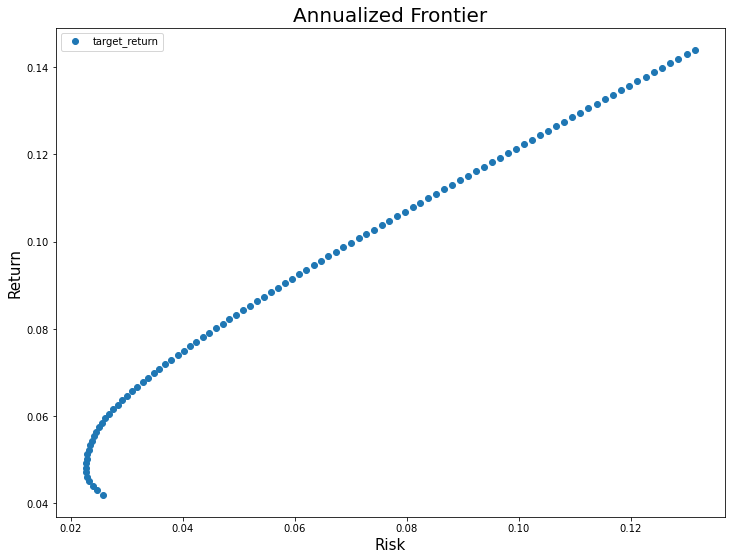

In [7]:
ax = return_risk_frontier.set_index('target_risk').plot(figsize=(12, 9), style='o')
ax.set_title('Annualized Frontier', fontsize=20)
ax.set_xlabel("Risk", fontsize=15)
ax.set_ylabel('Return', fontsize=15)

Get the Sharpe ratios

In [9]:
annualized_sharpe = (return_risk_frontier['target_return'] - 0) / return_risk_frontier['target_risk']
annualized_sharpe

0     1.627640
1     1.739411
2     1.844169
3     1.938139
4     2.015960
        ...   
95    1.114205
96    1.109478
97    1.104850
98    1.100317
99    1.095877
Length: 100, dtype: float64

We draw a graph with `annualized_sharpe`. Each dot represents the Sharpe ratio of each portfolio.

Text(0, 0.5, 'Sharpe Ratio')

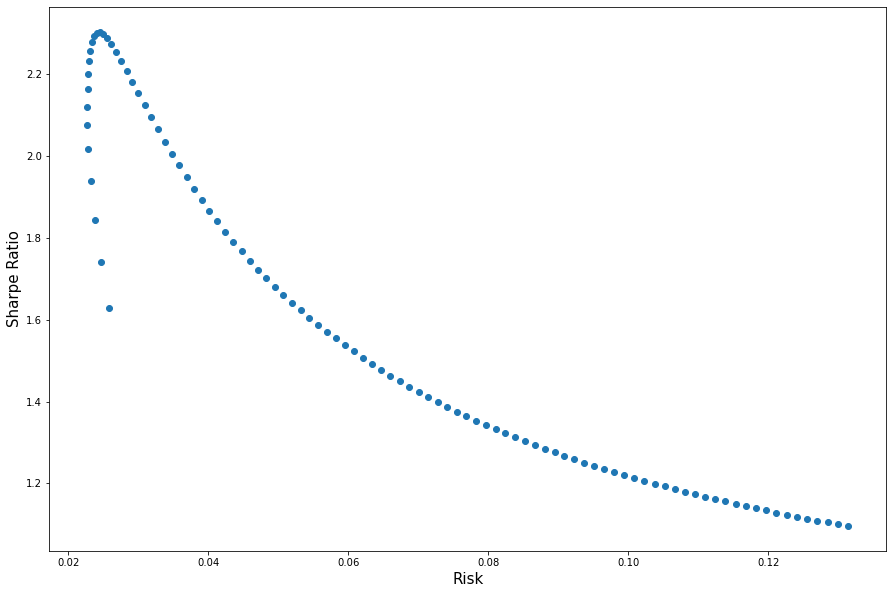

In [10]:
fig = plt.figure(figsize = (15, 10))
plt.plot(return_risk_frontier['target_risk'], annualized_sharpe, 'o')
plt.xlabel('Risk', fontsize = 15)
plt.ylabel('Sharpe Ratio', fontsize = 15)

We can select the row that has the maximum value of the Sharpe ratio as below.

In [11]:
return_risk_frontier[annualized_sharpe == max(annualized_sharpe)]

,target_risk,target_return
14,0.024509,0.056424
